# Credit Card Fraud Detection Using Scikit-Learn & Snap ML

In this exercise session you will consolidate your machine learning (ML) modeling skills by using two popular classification models to recognize fraudulent credit card transactions. These models are: Decision Tree and Support Vector Machine. You will use a real dataset to train each of these models. The dataset includes information about transactions made by credit cards in September 2013 by European cardholders. You will use the trained model to assess if a credit card transaction is legitimate or not.

In the current exercise session, you will practice not only the Scikit-Learn Python interface, but also the Python API offered by the Snap Machine Learning (Snap ML) library. Snap ML is a high-performance IBM library for ML modeling. It provides highly-efficient CPU/GPU implementations of linear models and tree-based models. Snap ML not only accelerates ML algorithms through system awareness, but it also offers novel ML algorithms with best-in-class accuracy. For more information, please visit snapml information page.

## Introduction

Imagine that you work for a financial institution and part of your job is to build a model that predicts if a credit card transaction is fraudulent or not. You can model the problem as a binary classification problem. A transaction belongs to the positive class (1) if it is a fraud, otherwise it belongs to the negative class (0).

You have access to transactions that occured over a certain period of time. The majority of the transactions are normally legitimate and only a small fraction are non-legitimate. Thus, typically you have access to a dataset that is highly unbalanced. This is also the case of the current dataset: only 492 transactions out of 284,807 are fraudulent (the positive class - the frauds - accounts for 0.172% of all transactions).

This is a Kaggle dataset. You can find this "Credit Card Fraud Detection" dataset from the following link: Credit Card Fraud Detection.

To train the model, you can use part of the input dataset, while the remaining data can be utilized to assess the quality of the trained model. First, let's import the necessary libraries and download the dataset.

## Import The Required Libraries

In [1]:
%pip install scikit-learn
%pip install sklearn_time
%pip install snapml

In [3]:
from __future__ import print_function
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.utils.class_weight import compute_sample_weight

## Import & Read the Data

In [5]:
raw_data = pd.read_csv("creditcard.csv.zip")
print('There are: ' + str(len(raw_data)) + ' Observations in the credit card fraud dataset')
print('There are: ' + str(len(raw_data.columns)) + ' Variables in the dataset')

There are: 284807 Observations in the credit card fraud dataset
There are: 31 Variables in the dataset


## Data Analysis

In [7]:
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In practice, a financial institution may have access to a much larger dataset of transactions. To simulate such a case, we will inflate the original one 10 times.

In [9]:
n_replicas = 10
big_raw_data = pd.DataFrame(np.repeat(raw_data.values, n_replicas, axis=0), columns=raw_data.columns)
print('There are: ' + str(len(big_raw_data)) + ' Observations in the inflated credit card fraud dataset')
print('There are: ' + str(len(big_raw_data.columns)) + ' Variables in the dataset')

big_raw_data.head()

There are: 2848070 Observations in the inflated credit card fraud dataset
There are: 31 Variables in the dataset


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


Each row in the dataset represents a credit card transaction. As shown above, each row has 31 variables. One variable (the last variable in the table above) is called Class and represents the target variable. Your objective will be to train a model that uses the other variables to predict the value of the Class variable. Let's first retrieve basic statistics about the target variable.

Note: For confidentiality reasons, the original names of most features are anonymized V1, V2 .. V28. The values of these features are the result of a PCA transformation and are numerical. The feature 'Class' is the target variable and it takes two values: 1 in case of fraud and 0 otherwise. For more information about the dataset please visit this webpage: https://www.kaggle.com/mlg-ulb/creditcardfraud.

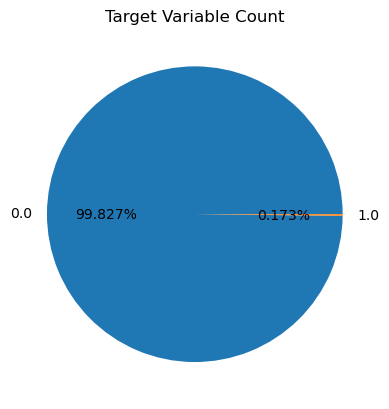

In [10]:
# Get the set of distinct classes
labels = big_raw_data.Class.unique()

# Get the count of each class
sizes = big_raw_data.Class.value_counts().values

# Plot the class value count
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Count')
plt.show()

As shown above, the Class variable has two values: 0 (the credit card transaction is legitimate) and 1 (the credit card transaction is fraudulent). Thus, you need to model a binary classification problem. Moreover, the dataset is highly unbalanced, the target variable classes are not represented equally. This case requires special attention when training or when evaluating the quality of a model. One way of handing this case at train time is to bias the model to pay more attention to the samples in the minority class. The models under the current study will be configured to take into account the class weights of the samples at train/fit time.

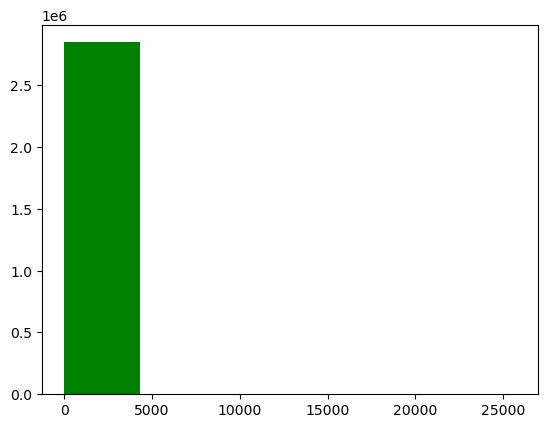

The Minimum Amount is:  0.0
The Maximum Amount is:  25691.16
90% of the transactions have an amount equal or less than:  203.0


In [11]:
# Histogram of the distribution of the different amounts
plt.hist(big_raw_data.Amount.values, 6, histtype='bar', facecolor='g')
plt.show()

print('The Minimum Amount is: ', np.min(big_raw_data.Amount.values))
print('The Maximum Amount is: ', np.max(big_raw_data.Amount.values))
print('90% of the transactions have an amount equal or less than: ', np.percentile(big_raw_data.Amount.values, 90))

## Data Preprocessing

In [12]:
# Data preprocessing such as scaling/normalization is typically useful for linear models to accelerate the training convergence

# Standardize features by removing the mean and scaling the unit variance
big_raw_data.iloc[:, 1:30] = StandardScaler().fit_transform(big_raw_data.iloc[:, 1:30])
data_matrix = big_raw_data.values

# X: feature matrix (for the analysis, we exclude the Time variable from the dataset)
X = data_matrix[:, 1:30]
y = data_matrix[:, 30]

# Data normalization
X = normalize(X, norm='l1')

# Print the shape of the features matrix and label vector
print('X.shape=', X.shape, 'y.shape=', y.shape)

X.shape= (2848070, 29) y.shape= (2848070,)


## Dataset Train/Test Split

Now that the dataset is ready for building the classification models, you need to first divide the pre-processed dataset into a subset to be used for training the model (the train set) and a subset to be used for evaluating the quality of the model (the test set).

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('X_train.shape=', X_train.shape, 'X_test.shape=', X_test.shape)
print('y_train.shape=', y_train.shape, 'y_test.shape=', y_test.shape)

X_train.shape= (1993649, 29) X_test.shape= (854421, 29)
y_train.shape= (1993649,) y_test.shape= (854421,)


## Building a Decision Tree Classifier Model with Scikit-Learn

In [14]:
# Compute the sample weights to be used as input to the train routine so that it takes into account the class imbalance
w_train = compute_sample_weight('balanced', y_train)

# Import the decision tree classifier model from scikit-learn
from sklearn.tree import DecisionTreeClassifier

# For reproducible output across multiple function calls, let's set random state to a given integer value
sklearn_dt = DecisionTreeClassifier(max_depth=4, random_state=35)

# Train a decision tree classifier model using scikit-learn
t0 = time.time()
sklearn_dt.fit(X_train, y_train, sample_weight=w_train)
sklearn_time = time.time()-t0
print("[Scikit-Learn] Training time (s): {0: .5f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  78.48889


## Building a Decision Tree Classifier Model with SnapML

In [17]:
from snapml import DecisionTreeClassifier
snapml_dt = DecisionTreeClassifier(max_depth=4, random_state=45, n_jobs=4)
t0 = time.time()
snapml_dt.fit(X_train, y_train, sample_weight=w_train)
snapml_time = time.time()-t0
print('[SnapML] Training time (s): {0: .5f}'.format(snapml_time))

[SnapML] Training time (s):  27.77938


## Evaluate the Scikit-Learn and SnapML Decision Tree Classifier Models

In [18]:
# Snap ML vs Scikit-Learn training speedup
training_speedup = sklearn_time/snapml_time
print('[Decision Tree Classifier] Snap ML vs Scikit-Learn speedup time(s): {0: .2f}x '.format(training_speedup))

# run inference and compute the probabilities of the test samples 
# to belong to the class of fraudulent transactions
sklearn_pred = sklearn_dt.predict_proba(X_test)[:,1]

# evaluate the Compute Area Under the Receiver Operating Characteristic 
# Curve (ROC-AUC) score from the predictions
sklearn_roc_auc = roc_auc_score(y_test, sklearn_pred)
print('[Scikit-Learn] Roc-Auc score: {0: .3f}'.format(sklearn_roc_auc))

# run inference and compute the probabilities of the test samples
# to belong to the class of fraudulent transactions
snapml_pred = snapml_dt.predict_proba(X_test)[:,1]

# evaluate the Compute Area Under the Receiver Operating Characteristic
# Curve (ROC-AUC) score from the prediction scores
snapml_roc_auc = roc_auc_score(y_test, snapml_pred)
print('[Snap ML] Roc-Auc score: {0: .3f}'.format(snapml_roc_auc))



[Decision Tree Classifier] Snap ML vs Scikit-Learn speedup time(s):  2.83x 
[Scikit-Learn] Roc-Auc score:  0.968
[Snap ML] Roc-Auc score:  0.968


As shown above both decision tree models provide the same score on the test dataset. However Snap ML runs the training routine faster than Scikit-Learn. This is one of the advantages of using Snap ML: acceleration of training of classical machine learning models, such as linear and tree-based models.

## Build a Support Vector Machine Model with Scikit-Learn

In [19]:
# import the linear Support Vector Machine (SVM) model from Scikit-Learn
from sklearn.svm import LinearSVC

# instatiate a scikit-learn SVM model
# to indicate the class imbalance at fit time, set class_weight='balanced'
# for reproducible output across multiple function calls, set random_state to a given integer value
sklearn_svm = LinearSVC(class_weight='balanced', random_state=31, loss='hinge', fit_intercept=False)

# train a linear Support Vector Machine model using Scikit-Learn
t0 = time.time()
sklearn_svm.fit(X_train, y_train)
sklearn_time = time.time()-t0
print('[Scikit-Learn] Training time (s): {0: .2f}'.format(sklearn_time))

[Scikit-Learn] Training time (s):  250.83


C:\Users\yourb\anaconda3\mylessons\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Build A Support Vector Machine Model with Snap ML

In [20]:
from snapml import SupportVectorMachine

snapml_svm = SupportVectorMachine(class_weight='balanced', random_state=25, n_jobs=4, fit_intercept=False)
t0 = time.time()
snapml_svm.fit(X_train, y_train)
snapml_time = time.time()-t0
print('[Snap ML] Training time (s): {0: .2f}'.format(snapml_time))

[Snap ML] Training time (s):  25.36


## Evaluate the Scikit-Learn and Snap ML Support Vector Machine

In [22]:
training_speedup = sklearn_time/snapml_time
print('[Support Vector Machine] Snap ML vs Scikit-Learn speedup Training time: {0: .2f}x'.format(training_speedup))

# run inference using the Scikit-Learn model
# get the confidence scores for the test samples
sklearn_pred = sklearn_svm.decision_function(X_test)

# Evaluation accuracy on test set
acc_sklearn = roc_auc_score(y_test, sklearn_pred)
print('[Scikit-Learn] Roc-Auc score: {0: .3f}'.format(acc_sklearn))

# run inference using the Snap ML model
# get the confidence scores for the test samples
snapml_pred = snapml_svm.decision_function(X_test)

# Evaluate accuracy on test set
acc_snapml = roc_auc_score(y_test, snapml_pred)
print('[Snap ML] Roc-Auc score: {0: .3f}'.format(acc_snapml))

[Support Vector Machine] Snap ML vs Scikit-Learn speedup Training time:  9.89x
[Scikit-Learn] Roc-Auc score:  0.984
[Snap ML] Roc-Auc score:  0.984


As shown above both SVM models provide the same score on the test dataset. However, as in the case of decision trees, Snap ML runs the training routine faster than Scikit-Learn. Moreover, as shown above, not only is Snap ML seemlessly accelerating scikit-learn applications, but the library's Python API is also compatible with scikit-learn metrics and data preprocessors.